# <center> Differential equations assignment </center>
## <div style="text-align:right"> Ilnur Garipov, BS17-3 </div>

We are given next conditions:
$$y' = sin^2x + yctgx$$
$$y(1) = 1$$
$$x \in [1;3]$$

At first let's find exact solution by solving it like Bernuolli equation:


$$y' - yctgx = sin^2x$$

$$y_c' - y_cctgx = 0$$
$$\frac{dy_c}{y_c} = ctgxdx$$
$$\int \frac{dy_c}{y_c} = \int ctgxdx$$
$$ln|y_c| = ln|sinx| + C$$
$$y_c = sinx$$

$$y = uy_c$$
$$(usinx)' - ucosx = sin^2x$$
$$u'sinx = sin^2x$$
$$du = sinxdx$$
$$\int du = \int sinxdx$$
$$u = -cosx + C$$
$$\frac{y}{sinx} = -cosx + C$$
$$y = sinx(-cosx + C)$$

$$y(1) = 1$$
$$sin(1)(C - cos(1)) = 1$$
$$C = csc(1) + cos(1)$$
$$y = sinx(-cosx + csc(1) + cos(1))$$

Now we'll draw plot of this exact solution and will use it as standart for comparing numerical methods 

<IPython.core.display.Javascript object>


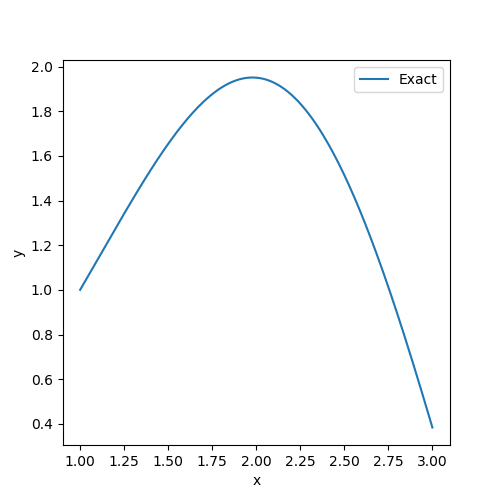

In [1]:
#%matplotlib inline
%matplotlib nbagg
import math
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import numpy as np

#Initializing task parameters
x0 = 1
y0 = 1
x1 = 3

#Function for getting exact value of y(x)
def y(x):
    C = 1/math.sin(1) + math.cos(1)
    return math.sin(x)*(-math.cos(x) + C)

#Generate x in given interval with given step
def gen_x(step, x0 = 1, x1 = 3):
    xs = list()
    for i in range(math.ceil((x1 - x0)/step)):
        xs += [x0 + i*step]
    xs += [x1]
    return xs

#Function for generating y's of exact solution for given x's
def Exact(xs):
    ys = list()
    for x in xs:
        ys += [y(x)]
    return ys
    
#Drawing a plot
fig_ex, ax_ex = plt.subplots(1, 1, figsize=(5, 5))
ax_ex.set_xlabel("x")
ax_ex.set_ylabel("y")
xs_exact = gen_x(step=0.01)
ys_exact = Exact(xs_exact)
ax_ex.plot(xs_exact, ys_exact, label = "Exact")
ax_ex.legend()
plt.draw()

Seems we get pretty easy graph without any asymptots, it's good. Now we will use Euler method calculating y.

<IPython.core.display.Javascript object>


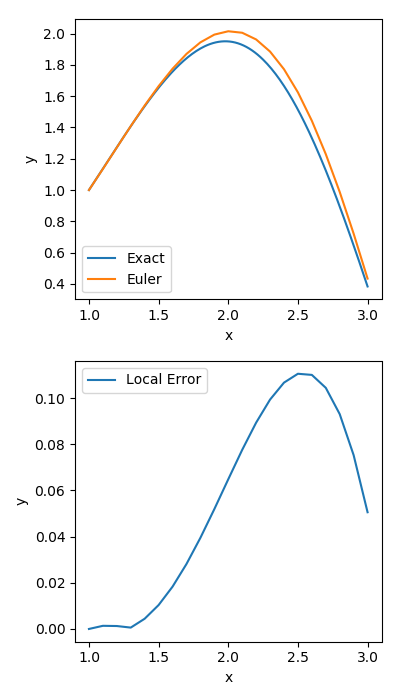

SelectionSlider(continuous_update=False, description='Step', index=9, options=(0.0001, 0.00025, 0.0005, 0.001,…

In [2]:
#Define here awesome function for step choosing
def step_selector(redraw):
    steps = [0.0001, 0.00025, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
    layout = {'width':'auto'}
    style = {'description_width' : 'initial'}
    slider = widgets.SelectionSlider(options=steps, value = 0.1, readout=True, continuous_update=False, description = "Step", style = style)
    slider.observe(lambda x: redraw(slider.value), 'value')
    
    manual = widgets.Checkbox(value = False, description = "Manually", layout = {'width':'auto', 'margin': '0 1em 0 0'}, style = style)
    def on_check(x):
        if manual.value is True:
            slider.set_trait('disabled', True)
            text.set_trait('disabled', False)
            redraw(text.value)
        else:
            slider.set_trait('disabled', False)
            text.set_trait('disabled', True)
            redraw(slider.value)
    manual.observe(on_check, 'value')
    text = widgets.BoundedFloatText(min=0.0001, max = 1, step = 0.0001, value = 0.01, layout = layout, disabled = True)
    text.observe(lambda x: redraw(text.value), 'value')
    
    box = widgets.HBox([manual, text])
    redraw(slider.value)
    display(slider, box)
    
#Function return difference list of 2 given lists  
def func_err(ys1, ys2):
    if (len(ys1) != len(ys2)): return
    y_err = list(range(len(ys1)))
    for i in range(len(ys1)):
        y_err[i] = math.fabs(ys1[i] - ys2[i])
    return y_err

def draw_method(fig, ax, method, name, step):
    xs = gen_x(step) 
    ys_num = method(xs)
    ax[0].clear()
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].plot(xs_exact, ys_exact, label = "Exact")
    ax[0].plot(xs, ys_num, label = name)
    ax[0].legend(loc = 'lower left')
    
    ys_err = func_err(Exact(xs), ys_num)
    ax[1].clear()
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].plot(xs, ys_err, label = "Local Error")
    ax[1].legend(loc = 'upper left')
    
    plt.tight_layout()
    plt.draw()
    
#Define function for calculationg derivate of y
def y_der(x, y):
    res = math.sin(x)**2 + y*(1/math.tan(x))
    return res

def Euler(xs):
    ys = [y0]
    for i in range(1, len(xs)):
        step = xs[i] - xs[i-1]
        ys += [ys[i-1] + y_der(xs[i-1], ys[i-1]) * step]
    return ys

fig_eu, ax_eu = plt.subplots(2, 1, figsize=(4, 7))
step_selector(lambda step: draw_method(fig_eu, ax_eu, Euler, "Euler", step))

Good enough. Maximum error almost don't excceed step size. Also we see that plot almost don't change with changing step size, there is always common pattern. Besides here is interesting effect that after error quite quick increase, it's decrease then by some reason. Let's analyze it.<br>
At first define value of y calculated by numerical method on point x as <i>z(x)</i> and step as <i>s</i>.<br>
Error quickly increase when around maxima point and it's obvious why it happen. If we will look y' again we will see that the only member that can be negative depends on y. So after maxima point x2:
$$z(x) > y(x) => |y'(x, z(x))| > |y'(x, y(x))|$$
But till some point x3
$$|y'(x, z(x))*s| < \int_x^{x+s} y(x)$$
But after some point x3≈2.6
$$|y'(x, z(x))*s| > \int_x^{x+s} y(x)$$
Ok now we will try Improved Euler method.

<IPython.core.display.Javascript object>


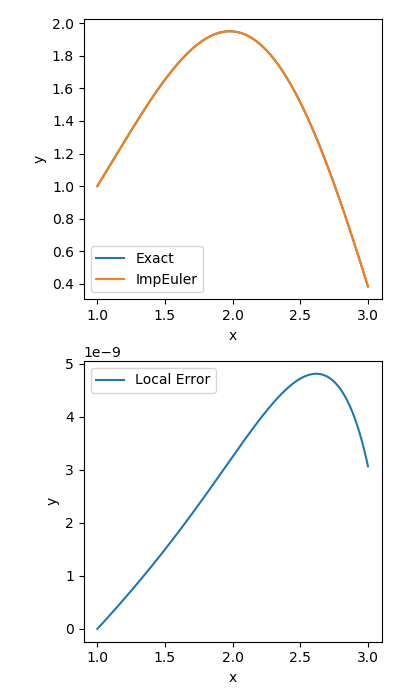

SelectionSlider(continuous_update=False, description='Step', index=9, options=(0.0001, 0.00025, 0.0005, 0.001,…

In [3]:
def ImpEuler(xs):
    ys = [y0]
    for i in range(1, len(xs)):
        step = xs[i] - xs[i-1]
        k1 = y_der(xs[i-1], ys[i-1])
        k2 = y_der(xs[i], ys[-1] + k1*step)
        ys += [ys[i-1] + (k1+k2)/2 * step]
    return ys

fig_imp, ax_imp = plt.subplots(2, 1, figsize=(4, 7))
step_selector(lambda step: draw_method(fig_imp, ax_imp, ImpEuler, "ImpEuler", step))

Seems much better, at least for given function. For step 0.1 it 20 time more accurate than regular Euler, for step 0.01 - more accurate to 200 times etc. Here also after some point error decrease, and the reason of it was described above.

<IPython.core.display.Javascript object>


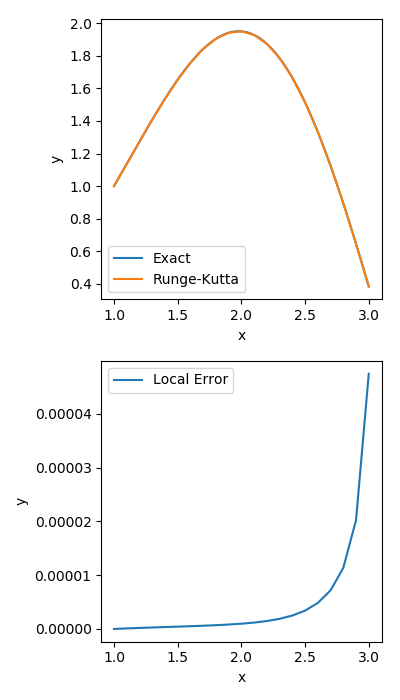

SelectionSlider(continuous_update=False, description='Step', index=9, options=(0.0001, 0.00025, 0.0005, 0.001,…

In [4]:
def Runge_Kutta(xs):
    ys = [y0]
    for i in range(1, len(xs)):
        step = xs[i] - xs[i-1]
        k1 = y_der(xs[i-1], ys[i-1])
        k2 = y_der((xs[i-1] + xs[i])/2, ys[i-1] + k1/2*step)
        k3 = y_der((xs[i-1] + xs[i])/2, ys[i-1] + k2/2*step)
        k4 = y_der(xs[i], ys[i-1] + k3*step)
        ys += [ys[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6*step]
    return ys

fig_run, ax_run = plt.subplots(2, 1, figsize=(4, 7))
step_selector(lambda step: draw_method(fig_run, ax_run, Runge_Kutta, "Runge-Kutta", step))

The best guy in this report. If we will use very small steps (e.g. 0.0001) plot will start jumping. Probably it's because roundoff error.

<IPython.core.display.Javascript object>


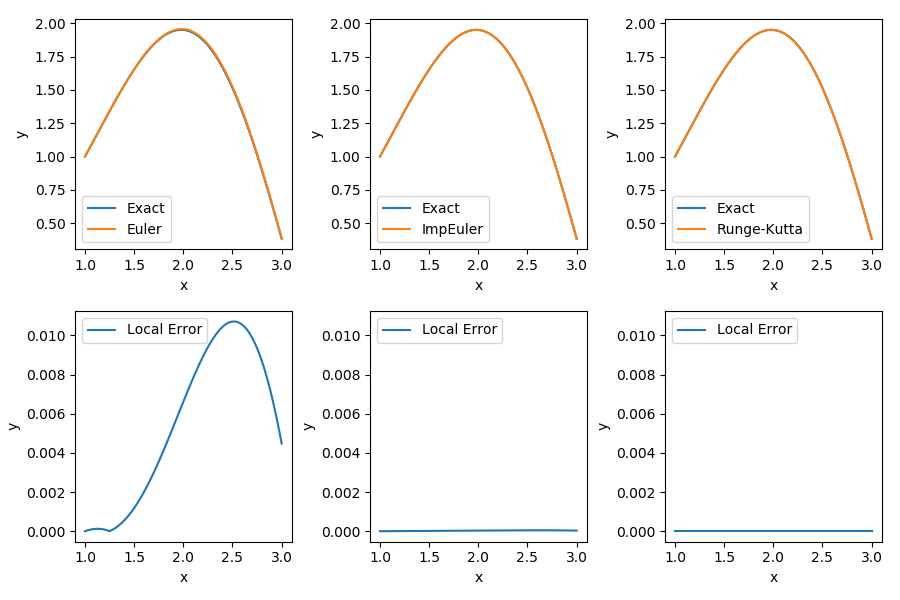

SelectionSlider(continuous_update=False, description='Step', index=9, options=(0.0001, 0.00025, 0.0005, 0.001,…

In [5]:
fig_all, ax_all = plt.subplots(2, 3, figsize=(9, 6))
ax_all[0][0].get_shared_y_axes().join(ax_all[0][0], ax_all[0][1], ax_all[0][2])
ax_all[1][0].get_shared_y_axes().join(ax_all[1][0], ax_all[1][1], ax_all[1][2])
def draw_all_methods(step):
    draw_method(fig_all, [ax_all[0][0], ax_all[1][0]], Euler, "Euler", step)
    draw_method(fig_all, [ax_all[0][1], ax_all[1][1]], ImpEuler, "ImpEuler", step)
    draw_method(fig_all, [ax_all[0][2], ax_all[1][2]], Runge_Kutta, "Runge-Kutta", step)
    plt.draw()
    
step_selector(draw_all_methods)

Here we can compare different numerical methods. Main conclusion that can do looking to comparison of local error plots - when we decrease step size, more efficient method's error plots become like parallel to x line. It's prove that these methods have different ofders of truncation error.

<IPython.core.display.Javascript object>


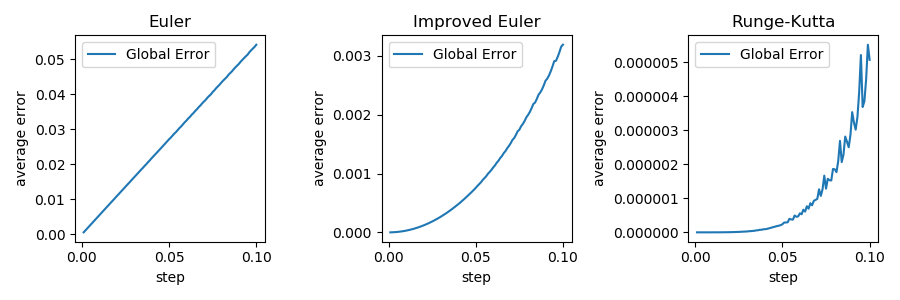

In [9]:
import decimal
from decimal import Decimal
from matplotlib.ticker import FormatStrFormatter

def global_error_selector(redraw):
    layout = {'width':'auto'}
    style = {'description_width' : 'initial'}
    min_text = widgets.BoundedFloatText(min=0.0001, max=0.1, value = 0.001, step=0.001, description="min step:", layout=layout, style=style)
    max_text = widgets.BoundedFloatText(min=0.001, max=1, value = 0.1, step=0.001, description="max step:", layout=layout, style=style)
    step_text = widgets.BoundedFloatText(min=0.0001, max=0.1, value = 0.001, step=0.001, description="step step: ¯\_(ツ)_/¯", layout=layout, style=style)
    button = widgets.Button(description = "Recalculate global errors", layout={'width':'20em'})
    button.on_click(lambda arg: redraw(min_text.value, max_text.value, step_text.value))
    text = widgets.Label(value = "Global error calculator", layout=layout, style=style)
    box1 = widgets.HBox([text, button])
    box2 = widgets.HBox([min_text, max_text, step_text])
    gbox = widgets.VBox([box1, box2])
    display(gbox)
    redraw(min_text.value, max_text.value, step_text.value)

fig_err, ax_err = plt.subplots(1, 3, figsize=(9,3))
def draw_global_errors(s0, s1, step):
    steps = gen_x(step, s0, s1)
    def draw_global_error(ax, method, name):
        ax.clear()
        ax.set_title(name)
        ax.tick_params(labelsize=10)
        #ax.set_xscale('log')
        ax.set_xlabel("step", fontsize = 10)
        ax.set_ylabel("average error", fontsize=10)
        ys_err = list()
        for step in steps:
            xs = gen_x(step)
            err = func_err(Exact(xs), method(xs))
            total = Decimal(0)
            for e in err:
                total += Decimal(e)
            ys_err += [float(total / len(err))]
        ax.plot(steps, ys_err, label = "Global Error")
        ax.legend(loc = 'upper left')
    
    draw_global_error(ax_err[0], Euler, "Euler")
    draw_global_error(ax_err[1], ImpEuler, "Improved Euler")
    draw_global_error(ax_err[2], Runge_Kutta, "Runge-Kutta")
    
    plt.tight_layout()
    plt.draw()
    
global_error_selector(draw_global_errors)

Euler method global error plot is linear It's not surprising if we will remember that local error plot has common pattern for all steps.
Improved Euler global error plot is exponential. It's proves again that this functions has different orders of truncation error.
Runge-Kutta as we can see even more efficient. But there are some jumps on this plot but with this accurance they negligible.
If will not up step above 0.01 this jumps almost disappear.